In [71]:
import sns
!pip install selenium
!pip install beautifulsoup4


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [277]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

download_service = Service()

driver = webdriver.Chrome(service=download_service)

In [278]:
driver.get(r"https://www.justjoin.it/?with-salary=yes")

In [279]:
from selenium.webdriver.common.by import By

btn_allow = driver.find_element(By.ID, 'cookiescript_accept')
btn_allow.click()

In [280]:
def zoom_out(driver, zoom_factor=0.8):
    driver.execute_script(f"document.body.style.zoom='{zoom_factor}'")

In [283]:
def is_fully_remote(location_element):
    if "Fully remote" in location_element.text:
        return True
    else:
        return False


def get_skill(skills, index):
    try:
        return skills[index].text
    except IndexError:
        return None


def get_currency(widelki):
    try:
        return widelki[1].split(" ")[3].strip()
    except IndexError:
        return None


def get_salary_to(widelki):
    try:
        return widelki[1].replace("PLN", "").strip()
    except IndexError:
        return None


def has_button(div): return len(div.find_elements(By.XPATH, './/button')) > 0


def get_main_location(location_element):
    if has_button(location_element):
        return \
            location_element.find_element(By.XPATH, './button').find_element(By.XPATH, './div').find_elements(By.XPATH,
                                                                                                              './span')[
                0].text
    else:
        return location_element.find_element(By.XPATH, './div').text




In [284]:
import time


def scroll(driver, timeout):
    global current_scroll
    driver.execute_script(f'window.scroll(0,{current_scroll + scroll_value})')
    current_scroll += scroll_value
    time.sleep(timeout)


In [285]:
current_scroll = 0
offers_list = {}
scroll_value = 1600
prev_offers_count = 0
max_attempts = 10
attempts = 0



In [286]:
scroller_element = driver.find_element(By.CSS_SELECTOR, '[data-viewport-type="window"]')
element_list_container = scroller_element.find_elements(By.XPATH, './div')[1]

In [287]:
while len(offers_list) < 6016 and attempts < max_attempts:
    elements = element_list_container.find_elements(By.CSS_SELECTOR, '[data-index]')

    for offer_element in elements:
        offer = offer_element.find_element(By.XPATH, "./div").find_element(By.XPATH, "./div")
        link = offer.find_element(By.XPATH, "./a").get_attribute('href')
        i = offer_element.get_attribute('data-index')
        if i not in offers_list:
            item = {}

            job_info_element = offer.find_elements(By.XPATH, "./div")[1]
            title_and_salary = job_info_element.find_elements(By.XPATH, "./div")[0]
            other_info = job_info_element.find_elements(By.XPATH, "./div")[1]
            job_title = title_and_salary.find_element(By.XPATH, 'h3').text
            item['job_title'] = job_title

            widelki = title_and_salary.find_element(By.XPATH, './div').find_elements(By.XPATH, './div')[
                0].text.split('-')
            salary_from = widelki[0].strip()
            salary_to = get_salary_to(widelki)
            currency = get_currency(widelki)
            item['salary_from'] = salary_from
            item['salary_to'] = salary_to
            item['currency'] = currency

            company_and_location = other_info.find_elements(By.XPATH, "./div")[0].find_element(By.XPATH,
                                                                                               './div').find_elements(
                By.XPATH, "./div")
            company = company_and_location[0].text
            location = company_and_location[1]
            main_location = get_main_location(location)
            item['company'] = company
            item['main_location'] = main_location

            skills = other_info.find_elements(By.XPATH, "./div")[1].find_element(By.XPATH, "./div").find_elements(
                By.XPATH, "./div")
            skill_tag1 = get_skill(skills, 0)
            skill_tag2 = get_skill(skills, 1)
            skill_tag3 = get_skill(skills, 2)

            item['skill_tag1'] = skill_tag1
            item['skill_tag2'] = skill_tag2
            item['skill_tag3'] = skill_tag3

            item['is_multi_location'] = has_button(location)
            item['is_fully_remote'] = is_fully_remote(location)

            item['link'] = link

            offers_list[i] = item
            print("gathered ", job_title)

    print("offers gathered:", len(offers_list))
    scroll(driver, 1)

    if len(offers_list) > prev_offers_count:
        prev_offers_count = len(offers_list)
        attempts = 0  
    else:
        attempts += 1 

print("Finished gathering offers.")


gathered  Analyst/Architect IBM BAW
gathered  Data Scientist (Fraud)
gathered  Remote Senior Cloud Engineer (DevSecOps)
gathered  Remote Mid Data Engineer
gathered  Customer Support Lead
gathered  Manual Tester
gathered  Technical Project Manager (jnr/mid)
gathered  Fullstack Java Developer
gathered  Project Manager (PMI)
gathered  Database Administrator
gathered  Full Stack Developer
gathered  Product Owner
gathered  Product Owner
gathered  Tester Automatyzujący
gathered  Product Owner - praca stacjonarna w Białymstoku
gathered  Remote FullStack (PHP +React) Developer
gathered  Quality Assurance Engineer
gathered  Senior Cloud Data Engineer (AWS/Azure and Databricks)
gathered  Senior Data Engineer
gathered  Senior Data Engineer
gathered  Oracle PL/SQL Developer
gathered  Product Owner
gathered  Senior Full Stack (Java/React) Developer
gathered  Java Tech Lead (React)
gathered  DevOps Engineer (Mid/Senior)
offers gathered: 25
gathered  iOS Developer
gathered  Android Developer
gathered

In [288]:
import pandas as pd

offers_df = pd.DataFrame.from_dict(offers_list, orient='index')
offers_df

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,link
0,Analyst/Architect IBM BAW,18 000,26 000,PLN,TUATARA,Warszawa,Analiza Biznesowa,IBM BAW,None,True,True,https://justjoin.it/job-offer/tuatara-analyst-...
1,Data Scientist (Fraud),10 791,12 666,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,False,False,https://justjoin.it/job-offer/auctane-poland-d...
2,Remote Senior Cloud Engineer (DevSecOps),22 000,31 000,PLN,Kingfisher plc,Kraków,GCP,DevOps,AWS,False,True,https://justjoin.it/job-offer/kingfisher-plc-r...
3,Remote Mid Data Engineer,15 000,19 000,PLN,Kingfisher plc,Kraków,Python,Azure,Data modeling,False,True,https://justjoin.it/job-offer/kingfisher-plc-r...
4,Customer Support Lead,8 000,8 500,PLN,Funtico,Warszawa,Customer Support,Communication,English,False,False,https://justjoin.it/job-offer/funtico-customer...
...,...,...,...,...,...,...,...,...,...,...,...,...
1778,,,None,None,,,,,,False,False,https://justjoin.it/job-offer/data-force-group...
1779,,,None,None,,,,,,False,False,https://justjoin.it/job-offer/calimala-ai-gena...
1780,,,None,None,,,,,,False,False,https://justjoin.it/job-offer/pixlab-koder-z-z...
1781,,,None,None,,,,,,False,False,https://justjoin.it/job-offer/onely-python-dev...


In [294]:
offers_df.to_csv('offers.csv', index=False)

#EKSPLORACJA

In [1]:
import pandas as pd

df = pd.read_csv('offers.csv')

In [79]:
df.dtypes

job_title            object
salary_from          object
salary_to            object
currency             object
company              object
main_location        object
skill_tag1           object
skill_tag2           object
skill_tag3           object
is_multi_location      bool
is_fully_remote        bool
link                 object
dtype: object

In [80]:
df.describe()

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,link
count,1774,1774,1759,1731,1773,1773,1769,1641,1362,1783,1783,1783
unique,1302,274,325,1,579,54,496,461,450,2,2,1783
top,DevOps Engineer,20 000,25 000,PLN,Antal Sp. z o.o.,Warszawa,Python,SQL,SQL,True,True,https://justjoin.it/job-offer/tuatara-analyst-...
freq,25,103,90,1731,59,799,97,70,59,909,1007,1


In [81]:
nan_count_per_column = df.isna().sum()

print("Liczba NaN w każdej kolumnie:")
print(nan_count_per_column)


Liczba NaN w każdej kolumnie:
job_title              9
salary_from            9
salary_to             24
currency              52
company               10
main_location         10
skill_tag1            14
skill_tag2           142
skill_tag3           421
is_multi_location      0
is_fully_remote        0
link                   0
dtype: int64


In [2]:
# Zastosowanie dropna() z pominięciem kolumn 'skill_tag1', 'skill_tag2', 'skill_tag3' -- w tych kolumnach często są NaNs, ale nie przeszkodzi to w analize
df_cleaned = df.dropna(subset=df.columns.difference(['skill_tag1', 'skill_tag2', 'skill_tag3']))

print(f"Liczba wierszy po usunięciu NaN (pomijając skill_tag kolumny): {df_cleaned.shape[0]}")
df_cleaned.describe()


Liczba wierszy po usunięciu NaN (pomijając skill_tag kolumny): 1730


,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,link
count,1730,1730,1730,1730,1730,1730,1726,1601,1331,1730,1730,1730
unique,1273,252,308,1,574,53,488,457,440,2,2,1730
top,DevOps Engineer,20 000,25 000,PLN,Jit Team,Warszawa,Python,Python,SQL,True,True,https://justjoin.it/job-offer/tuatara-analyst-...
freq,25,103,90,1730,59,778,96,68,59,888,989,1


In [83]:
df_cleaned

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,link
0,Analyst/Architect IBM BAW,18 000,26 000,PLN,TUATARA,Warszawa,Analiza Biznesowa,IBM BAW,NaN,True,True,https://justjoin.it/job-offer/tuatara-analyst-...
1,Data Scientist (Fraud),10 791,12 666,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,False,False,https://justjoin.it/job-offer/auctane-poland-d...
2,Remote Senior Cloud Engineer (DevSecOps),22 000,31 000,PLN,Kingfisher plc,Kraków,GCP,DevOps,AWS,False,True,https://justjoin.it/job-offer/kingfisher-plc-r...
3,Remote Mid Data Engineer,15 000,19 000,PLN,Kingfisher plc,Kraków,Python,Azure,Data modeling,False,True,https://justjoin.it/job-offer/kingfisher-plc-r...
4,Customer Support Lead,8 000,8 500,PLN,Funtico,Warszawa,Customer Support,Communication,English,False,False,https://justjoin.it/job-offer/funtico-customer...
...,...,...,...,...,...,...,...,...,...,...,...,...
1768,Python Developer,17 000,22 000,PLN,Digital First AI,Kraków,Python,AI,RESTful API,False,True,https://justjoin.it/job-offer/digital-first-ai...
1769,Junior Hacker,5 000,8 000,PLN,BillTech,Warszawa,Node.js,TypeScript,SQL,False,True,https://justjoin.it/job-offer/billtech-junior-...
1770,Scala Developer (Spark),25 200,31 920,PLN,SCALO,Warszawa,Spark,Scala,Hadoop,False,True,https://justjoin.it/job-offer/scalo-scala-deve...
1771,Frontend Developer (Angular),12 000,19 500,PLN,InsERT,Wrocław,Angular,Python,Azure,False,False,https://justjoin.it/job-offer/insert-frontend-...


In [3]:
def clean_salary(salary):
    if type(salary) != float:
        return float(salary.replace(' ', ''))
    return salary


df_cleaned['salary_from'] = df_cleaned['salary_from'].apply(clean_salary)
df_cleaned['salary_to'] = df_cleaned['salary_to'].apply(clean_salary)

print(type(df_cleaned.loc[1, 'salary_from']))


<class 'numpy.float64'>


/var/folders/3_/qkrhxtsn47b3yp9yw5rxp6dc0000gn/T/ipykernel_17875/3703189161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['salary_from'] = df_cleaned['salary_from'].apply(clean_salary)
/var/folders/3_/qkrhxtsn47b3yp9yw5rxp6dc0000gn/T/ipykernel_17875/3703189161.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['salary_to'] = df_cleaned['salary_to'].apply(clean_salary)


In [4]:
df = df_cleaned

### word cloud from skills

In [88]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

skills = df['skill_tag1'].dropna().str.cat(df['skill_tag2'].dropna(), sep=' ').str.cat(df['skill_tag3'].dropna(),
                                                                                       sep=' ').dropna()

combined_string = ' '.join(skills)
combined_string

'SQL Python Machine Learning GCP DevOps AWS Python Azure Data modeling Customer Support Communication English English Linux Bash Java Hibernate Spring Cassandra NoSQL MongoDB JavaScript Java Spring Boot Product Management Product Backlog Refinement Confluence Product Management Product Backlog Refinement Business Analysis Scrum Git Selenium Jenkins Cucumber Swagger AWS Azure SQL Python T-SQL SQL SQL PL/SQL Oracle Java React Kafka Java Apache Kafka Spring Boot Kubernetes Terraform Ansible CocoaPods MVVM UIKit Android Coroutines Compose-ui React JavaScript MUI Java Kafka React Java Kafka React E-commerce MySQL PHP ECS s3 Docker Kubernetes Python GCP Java SOA RabbitMQ Java SOA Apache Kafka Delphi VCL RTL Python Git LlamaIndex Amazon Web Services Cloud Computing IT Security Windows Server Jenkins CI/CD Java Angular Spring Team Player Communication RESTful API English Python AWS JavaScript SDLC CI AWS Architecture SOA Event-Driven Architecture Java Enterprise Java Jenkins wiremock UX/UI HTM

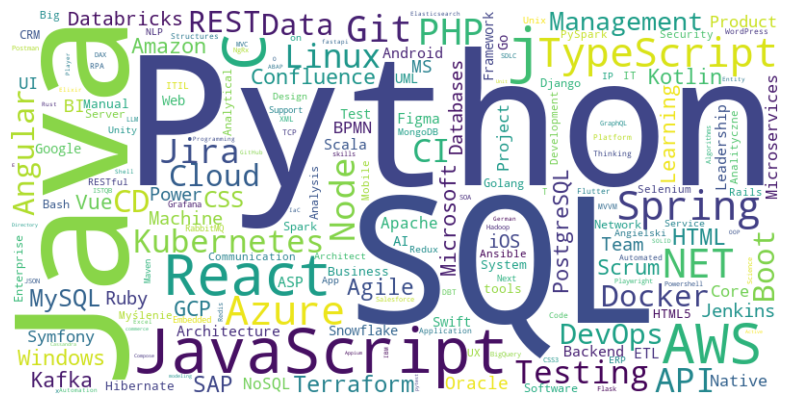

In [51]:
stop_words = ['english', 'English', 'company', 'Polish']

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False,
                      stopwords=stop_words).generate(combined_string)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

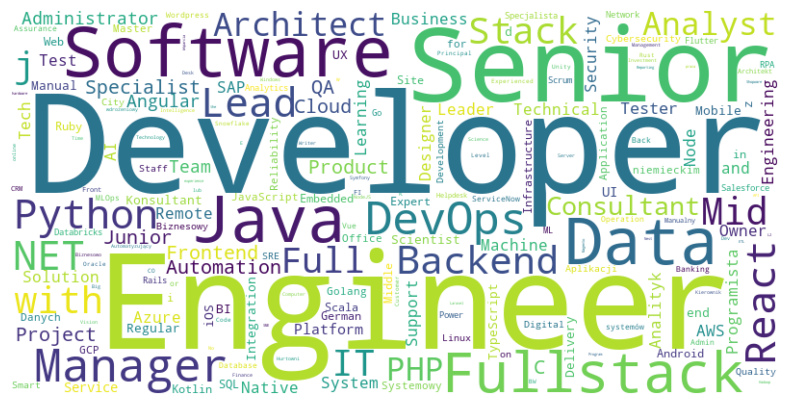

In [91]:
combined_job_titles = ' '.join(df['job_title'])

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False,
                      stopwords=stop_words).generate(combined_job_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

# are engineers paid more than developers?

/var/folders/3_/qkrhxtsn47b3yp9yw5rxp6dc0000gn/T/ipykernel_38498/1849838408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developer_jobs['salary_range'] = (developer_jobs['salary_from'] + developer_jobs['salary_to']) / 2
/var/folders/3_/qkrhxtsn47b3yp9yw5rxp6dc0000gn/T/ipykernel_38498/1849838408.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineer_jobs['salary_range'] = (engineer_jobs['salary_from'] + engineer_jobs['salary_to']) / 2
/var/folders/3_/qkrhxtsn47b3yp9yw5rxp6dc0000gn/T/ipykernel_38

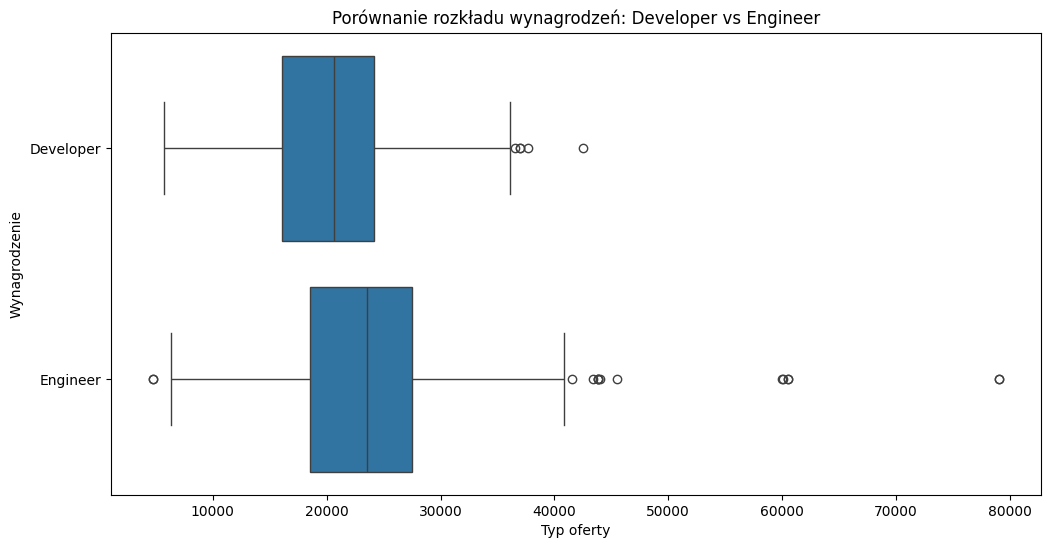

In [142]:


# Filtracja ofert zawierających "developer" w tytule
developer_jobs = df[df['job_title'].str.contains('developer', case=False, na=False)]

# Filtracja ofert zawierających "engineer" w tytule
engineer_jobs = df[df['job_title'].str.contains('engineer', case=False, na=False)]

#Tworzymy kolumnę "salary_range" dla obu grup
developer_jobs['salary_range'] = (developer_jobs['salary_from'] + developer_jobs['salary_to']) / 2
engineer_jobs['salary_range'] = (engineer_jobs['salary_from'] + engineer_jobs['salary_to']) / 2
#
# Dodajemy kolumnę 'job_group', aby rozróżnić oferty
developer_jobs['job_group'] = 'Developer'
engineer_jobs['job_group'] = 'Engineer'

combined_jobs = pd.concat([developer_jobs, engineer_jobs])

# Filtracja wierszy, w których wynagrodzenie (salary_range) jest poniżej 100 000 -- pozniej dowiaduję się, że to oferty zagraniczne, ale usunalem teraz, bo zakłócało to wykres i nie było nic na nim widać
realistic_jobs = combined_jobs[combined_jobs['salary_range'] < 100000]

# Tworzymy wykres boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y='job_group', x='salary_range', data=realistic_jobs)
plt.title('Porównanie rozkładu wynagrodzeń: Developer vs Engineer')
plt.ylabel('Wynagrodzenie')
plt.xlabel('Typ oferty')
plt.show()


Yes, engineers are paid slightly more than developers. But how much?

In [151]:
mean_per_job_group = combined_jobs.groupby('job_group').salary_range.mean()

mean_developer = mean_per_job_group['Developer']
mean_engineer = mean_per_job_group['Engineer']

print(mean_engineer / mean_developer)

1.1709934699985438


#### Wniosek: Inżynierzy są wynagradzani o 17% więcej niż zwykli deweloperzy

##### Test hipotezy:
- H0: Średnie wynagrodzenie dla inżynierów i deweloperów są równe.
- H1: Średnie wynagrodzenie dla inżynierów jest wyższe niż dla deweloperów.

In [8]:
to_scalar = df.dropna(subset=df.columns.difference(['skill_tag2', 'skill_tag3']))
scala_jobs = to_scalar[to_scalar['skill_tag1'].str.contains('Scala')]
scala_jobs

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,link
237,Senior Data Engineer,26880.0,27720.0,PLN,Avenga,Wrocław,Python / Scala,SQL,Azure Databricks,False,True,https://justjoin.it/job-offer/avenga-senior-da...
739,Mid / Senior Remote Scala Developer,13200.0,28500.0,PLN,SoftwareMill,Warszawa,Scala,Software Architecture,NaN,False,True,https://justjoin.it/job-offer/softwaremill-mid...
986,👉 Middle/Senior Scala Developer,18000.0,26000.0,PLN,Xebia sp. z o.o.,Wrocław,Scala,Docker,AWS,True,True,https://justjoin.it/job-offer/xebia-sp-z-o-o--...
1030,Scala Engineer,25000.0,35000.0,PLN,Evolution,Warszawa,Scala,Cassandra,JVM,False,False,https://justjoin.it/job-offer/evolution-scala-...
1233,Junior Software Engineer (31065),11333.0,15583.0,PLN,Splunk,Kraków,Scala,Java,Apache Spark,True,False,https://justjoin.it/job-offer/splunk-junior-so...
1395,Software Engineer,15000.0,20000.0,PLN,Lekta AI,Kraków,Scala,Java,Kotlin,True,True,https://justjoin.it/job-offer/lekta-ai-softwar...
1412,Data Engineer (Investment Banking Tech),10000.0,16000.0,PLN,HSBC Service Delivery,Kraków,Scala,Haskell,Analytical skills,False,False,https://justjoin.it/job-offer/hsbc-service-del...
1466,Senior React and Scala/JAVA Developer (Investm...,22000.0,25000.0,PLN,HSBC Service Delivery,Kraków,Scala,React,Java,False,False,https://justjoin.it/job-offer/hsbc-service-del...


In [180]:
from scipy.stats import ttest_ind

engineer_salary = engineer_jobs['salary_range'].dropna()
developer_salary = developer_jobs['salary_range'].dropna()

t_stat, p_value = ttest_ind(engineer_salary, developer_salary)

if p_value < 0.05:
    print("Hipoteza alternatywna jest prawdziwa: Inżynierowie mają wyższe wynagrodzenie.")
else:
    print("Brak dowodów na różnicę w wynagrodzeniach między inżynierami a deweloperami.")

Hipoteza alternatywna jest prawdziwa: Inżynierowie mają wyższe wynagrodzenie.


### Is Mean salary in the top5 higher than in other cities? 

In [152]:
df['salary_range'] = (df['salary_from'] + df['salary_to']) / 2
df['main_location'] = df['main_location'].replace(
    {'Gdańsk': 'Trójmiasto', 'Sopot': 'Trójmiasto', 'Gdynia': 'Trójmiasto', 'Warsaw': 'Warszawa',
     'Krakow, Lesser Poland': 'Kraków'})

cities_to_exclude = ['Amsterdam', 'Bruksela', 'Berlin', 'Londyn', 'Frankfurt am Main', 'Minnetonka', 'Luxembourg',
                     'Riyadh', 'Paryż', 'Sztokholm', 'Wilno', 'Vilnius', 'St. Julian’s', 'Walencja', 'Land O\' Lakes']
pattern = '|'.join(cities_to_exclude)

df = df[~df['main_location'].str.contains(pattern, case=False, na=False)]

#Get the TOP5 salary -- 
top5 = ['Warszawa',
        'Wrocław',
        'Kraków',
        'Trójmiasto',
        'Poznań']
top5_condition = "|".join(top5)
top5_jobs = df[df['main_location'].str.contains(top5_condition, case=False, na=False)]
not_top5_jobs = df[~df['main_location'].str.contains(top5_condition, case=False, na=False)]
warsaw_jobs = df[df['main_location'].str.contains('Warszawa', case=False, na=False)]
not_top5_jobs

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,link,salary_range,job_group,location_group
1,Data Scientist (Fraud),10791.0,12666.0,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,False,False,https://justjoin.it/job-offer/auctane-poland-d...,11728.5,Not_top_5,Not_top_5
14,Product Owner - praca stacjonarna w Białymstoku,10000.0,18000.0,PLN,cronn Polska,Białystok,Zarządzanie zespołem,Analityczne Myślenie,NaN,True,False,https://justjoin.it/job-offer/cronn-polska-pro...,14000.0,Not_top_5,Not_top_5
15,Remote FullStack (PHP +React) Developer,13300.0,21400.0,PLN,Montrose Software( Polska) Sp.z.o.o,Łódź,PHP,SQL,NaN,True,True,https://justjoin.it/job-offer/montrose-softwar...,17350.0,Not_top_5,Not_top_5
17,Senior Cloud Data Engineer (AWS/Azure and Data...,21000.0,33000.0,PLN,Future Processing,Gliwice,AWS,Azure,SQL,True,True,https://justjoin.it/job-offer/future-processin...,27000.0,Not_top_5,Not_top_5
37,Delphi Developer,25000.0,27000.0,PLN,Kevin Edward,Poland (Remote),Delphi,VCL,RTL,False,True,https://justjoin.it/job-offer/kevin-edward-del...,26000.0,Not_top_5,Not_top_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,Software Tester,4700.0,7000.0,PLN,9bits sp. z o.o.,Białystok,Communication Skills,Team Player,Angielski,False,False,https://justjoin.it/job-offer/9bits-sp-z-o-o-s...,5850.0,Not_top_5,Not_top_5
1735,AI Developer,12000.0,17000.0,PLN,Spectre Defence Solutions sp. z o.o.,Ołtarzew,Python,PyTorch,OpenCV,False,True,https://justjoin.it/job-offer/spectre-defence-...,14500.0,Not_top_5,Not_top_5
1742,Full Stack Developer,20389.0,24467.0,PLN,A Media Group,Poland (Remote),WordPress,PHP,Next.js,False,True,https://justjoin.it/job-offer/a-media-group-fu...,22428.0,Not_top_5,Not_top_5
1747,Fullstack Developer (.NET + React),16799.0,18480.0,PLN,SCALO,Łódź,English,React,.Net,True,True,https://justjoin.it/job-offer/scalo-fullstack-...,17639.5,Not_top_5,Not_top_5


/var/folders/3_/qkrhxtsn47b3yp9yw5rxp6dc0000gn/T/ipykernel_38498/3387557624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='main_location', x='salary_range', data=top5_jobs, palette = 'Set2')


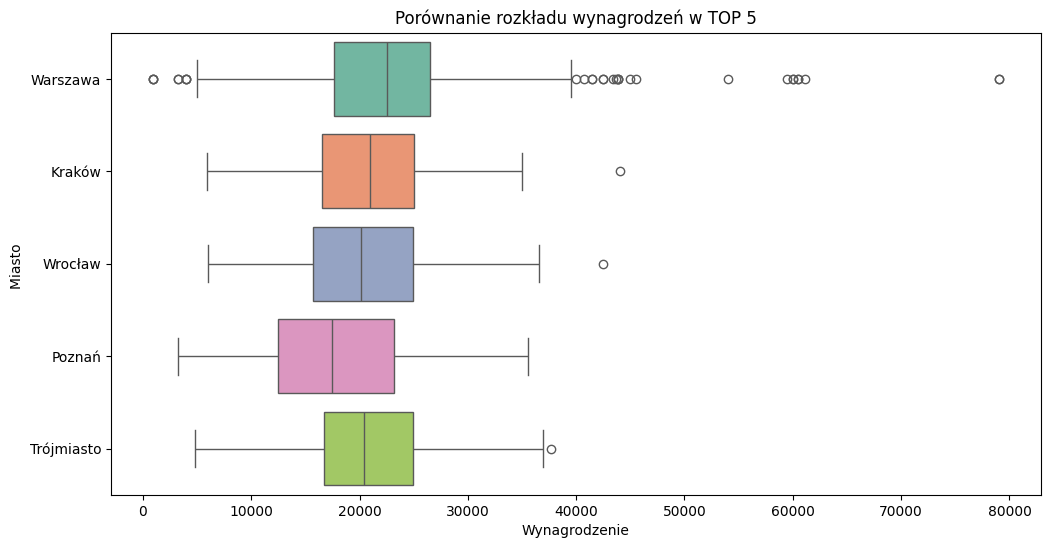

In [157]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='main_location', x='salary_range', data=top5_jobs, palette = 'Set2')
plt.title('Porównanie rozkładu wynagrodzeń w TOP 5')
plt.ylabel('Miasto ')
plt.xlabel('Wynagrodzenie')
plt.show()

In [156]:
top5_jobs.groupby('main_location').salary_range.describe()

,count,mean,std,min,25%,50%,75%,max
main_location,,,,,,,,
Kraków,285.0,21017.861404,6241.750178,5900.0,16500.00,21000.0,25000.00,44000.0
Poznań,79.0,18237.708861,7146.517159,3227.0,12500.00,17500.0,23195.25,35550.0
Trójmiasto,146.0,20537.527397,6308.523776,4850.0,16718.75,20417.5,24945.00,37680.0
Warszawa,785.0,22646.499363,8488.028096,950.0,17599.50,22500.0,26544.00,79000.0
Wrocław,218.0,20366.167431,6681.117158,6000.0,15716.25,20155.0,24975.00,42500.0


/var/folders/3_/qkrhxtsn47b3yp9yw5rxp6dc0000gn/T/ipykernel_38498/3810873460.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='salary_range', y='location_group', data=to_show, palette='Set2')


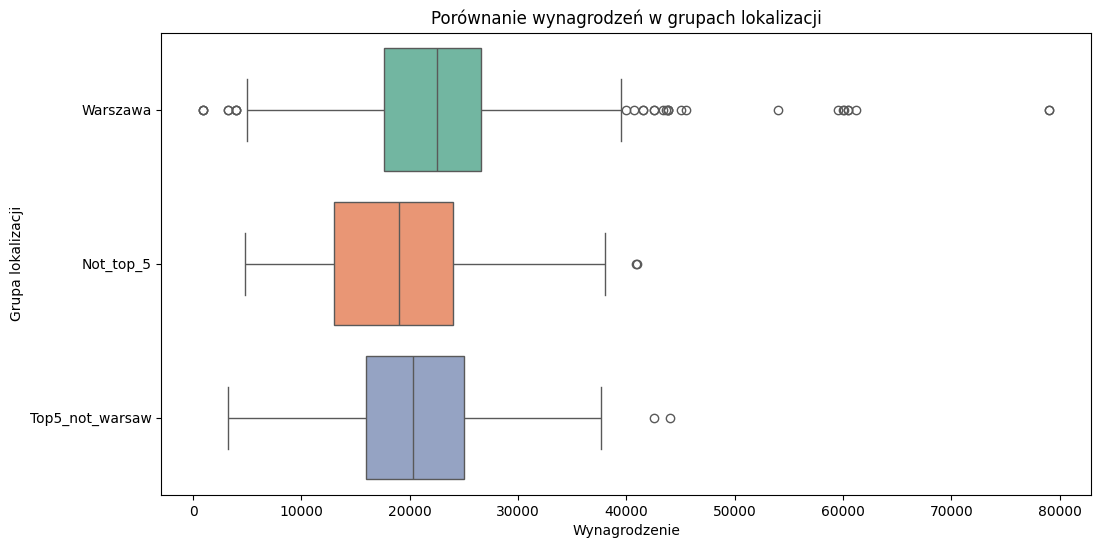

In [154]:
df['location_group'] = 'Not_top_5'
df.loc[df['main_location'].str.contains('Warszawa|Warsaw', case=False, na=False), 'location_group'] = 'Warszawa'
df.loc[(df['main_location'].str.contains(top5_condition, case=False, na=False)) &
       (~df['main_location'].str.contains('Warszawa|Warsaw', case=False, na=False)), 'location_group'] = 'Top5_not_warsaw'

to_show = df[df['salary_range'] < 100000]

plt.figure(figsize=(12, 6))
sns.boxplot(x='salary_range', y='location_group', data=to_show, palette='Set2')

# Tytuł i etykiety osi
plt.title('Porównanie wynagrodzeń w grupach lokalizacji')
plt.ylabel('Grupa lokalizacji')
plt.xlabel('Wynagrodzenie')

# Wyświetlenie wykresu
plt.show()

In [147]:
df.groupby('location_group').salary_range.describe()

,count,mean,std,min,25%,50%,75%,max
location_group,,,,,,,,
Not_top_5,196.0,18849.622449,7083.081464,4750.0,13000.0,18975.0,24000.000,41000.0
Top5_not_warsaw,728.0,20424.688187,6528.513110,3227.0,15990.0,20292.5,24999.625,44000.0
Warszawa,785.0,22646.499363,8488.028096,950.0,17599.5,22500.0,26544.000,79000.0


#### Wniosek: Wynagrodzenia z top 5 są wyższe niż w innych polskich miastach. Tym bardziej w Warszawie
Natomiast najmniej spośród top 5 dostaniemy w Poznaniu, a najwięcej, poza Warszawą, w Krakowie.

# To be remote or not to be remote?
Czy stanowiska pełnie zdalne są lepiej wynagradzane?

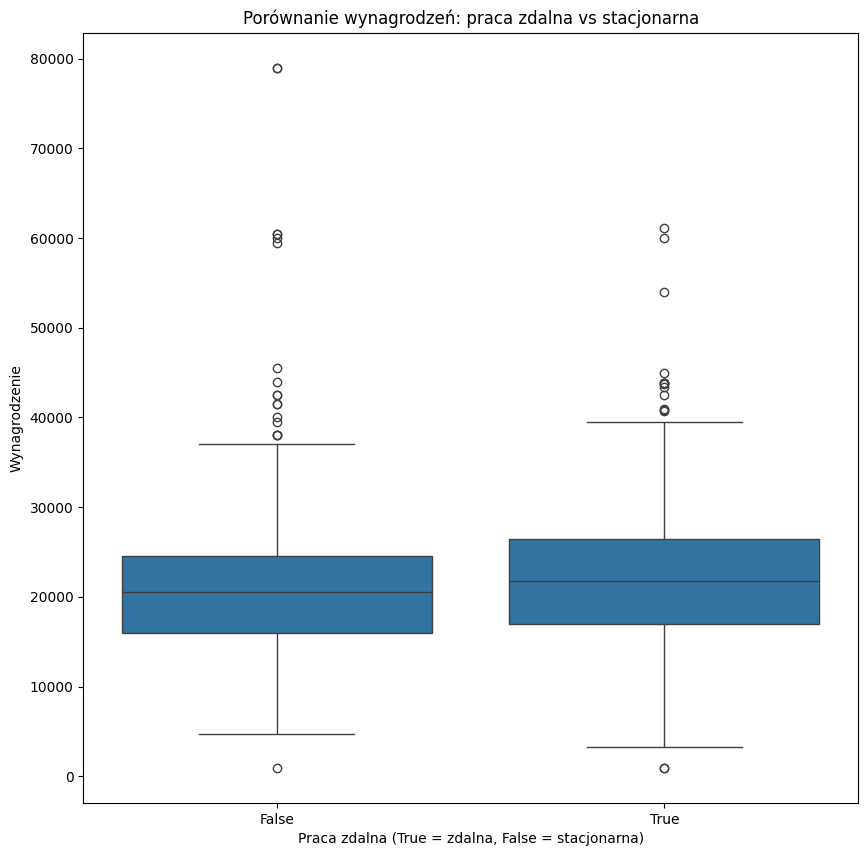

In [175]:
#Zamiana typu is_fully_remote na str -- są problemy po fetchowaniu po kluczu typu bool

columns_to_convert = ['is_fully_remote']
remote_df = df.copy()
remote_df[columns_to_convert] = df[columns_to_convert].astype(str)

plt.figure(figsize=(10, 10))
sns.boxplot(x='is_fully_remote', y='salary_range', data=df)

plt.title('Porównanie wynagrodzeń: praca zdalna vs stacjonarna')
plt.xlabel('Praca zdalna (True = zdalna, False = stacjonarna)')
plt.ylabel('Wynagrodzenie')

plt.show()

In [176]:
remote_df.groupby('is_fully_remote').salary_range.describe()

,count,mean,std,min,25%,50%,75%,max
is_fully_remote,,,,,,,,
False,735.0,20574.304762,8131.111189,950.0,15980.0,20500.00,24541.0,79000.0
True,974.0,21785.510267,7258.715611,950.0,17025.0,21783.25,26506.0,61168.5


In [179]:
mean_per_remote = remote_df.groupby('is_fully_remote').salary_range.mean()

mean_remote = mean_per_remote['True']
mean_not_remote = mean_per_remote['False']

print(mean_remote / mean_not_remote)

1.0588698145114652


Wniosek: Tak, prace pełnie zdalne są lepiej wynagradzane, ale niewiele, bo tylko o 5%